In [71]:
import numpy as np
import math 
import matplotlib.pyplot as plt
import scipy.io

(273, 270, 4)
(273, 270)


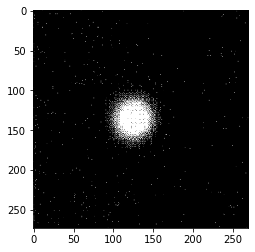

In [93]:
# Read image
img = plt.imread('image_test_2.png', 0)
print(img.shape)

# Select just one layer (red) and convert to float
U_test = numpy.array(img[:,:,0], dtype = numpy.float64)
print(U_test.shape)

plt.imshow(img)
plt.show()

In [83]:
# Convert rgb to gray 
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

In [84]:
# Display the spectrum
def plotSpectre(image, Lx, Ly):
    (Ny, Nx, p) = image.shape
    fxm = Nx*1.0 / (2*Lx)
    fym = Ny*1.0 / (2*Ly)
    plt.imshow(image,extent=[-fxm,fxm,-fym,fym])
    plt.xlabel("fx")
    plt.ylabel("fy")
    
# Convert a matrix into an RGB image matrix
def matriceImage(matrice,gamma,rgb):
    s = matrice.shape
    a=1.0/gamma;
    norm=matrice.max()
    m = numpy.power(matrice/norm,a)
    im = numpy.zeros((s[0],s[1],3),dtype=float64)
    im[:,:,0] = rgb[0]*m
    im[:,:,1] = rgb[1]*m
    im[:,:,2] = rgb[2]*m
    return im

# Generates an RGB image from a matrix, by applying a logarithmic function
def matriceImageLog(matrice,rgb):
    s = matrice.shape
    m = numpy.log10(1+matrice)
    min = m.min()
    max = m.max()
    m = (m-min)/(max-min)
    im = numpy.zeros((s[0],s[1],3),dtype=float64)
    im[:,:,0] = rgb[0]*m
    im[:,:,1] = rgb[1]*m
    im[:,:,2] = rgb[2]*m
    return im

(273, 270)


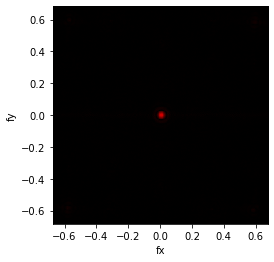

In [85]:
# The discrete Fourier transform
V = np.fft.fft2(U_test)

# Obtain the zero frequency center
VC = np.fft.fftshift(V)

# Calculates the power
P = np.power(np.absolute(VC),2)
print(P.shape)
#plt.imshow(P, cmap = 'gray')
#plt.show()

# Convert to RGB matrix
img = matriceImage(P, 2.0, [1.0,0.0,0.0])

# Display the spectrum
plotSpectre(img, 200.0, 200.0)

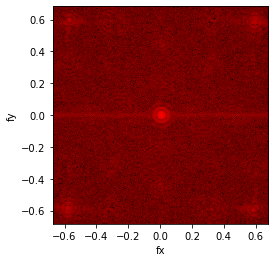

In [86]:
img = matriceImageLog(P,[1.0,0.0,0.0])

# Display the spectrum
plotSpectre(img, 200.0, 200.0)

**Load mat file**

In [87]:
def loadMatFile(file_path, file_name, key):
    """
    Load a mat file and return an item of the dictionary loaded.
    """    
    # read mat file dictionary
    dictionary = scipy.io.loadmat(file_path + file_name)
    
    # access item of a dictionary
    array = dictionary[key]
    
    return array

In [88]:
# Folder's path
path = 'C:\\Users\\ferna\\Desktop\\computerGeneratedHolography'

# Load hologram dataset
file_path = path + '\\output\\dataset\\'
file_name = 'hDataset.mat'
key = 'hDataset'
dat = loadMatFile(file_path, file_name, key)

<class 'numpy.complex128'>


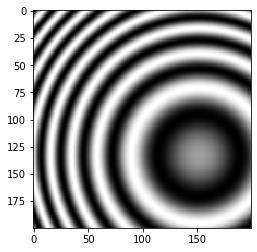

In [92]:
img = dat[:,:,1]
print(type(img[1,1]))

plt.imshow(np.real(img), cmap = 'gray')
plt.show()

c:\users\ferna\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


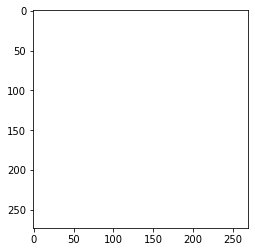

In [98]:
# The discrete Fourier transform
f = np.fft.fft2(img)

# Obtain the zero frequency center
fshift = np.fft.fftshift(f)

# Magnitude spectrum
magnitude_spectrum = 20*np.log(np.abs(fshift))

# Display
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.show()